# Supply Chain Shipment Pricing Data - Data Analysis and Modeling

Dataset URL - https://www.kaggle.com/divyeshardeshana/supply-chain-shipment-pricing-data

In [20]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py

## 1. Loading and Understanding the Data

In [21]:
DataSet = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [22]:
DataSet.dtypes

ID                                int64
Project Code                        str
PQ #                                str
PO / SO #                           str
ASN/DN #                            str
Country                             str
Managed By                          str
Fulfill Via                         str
Vendor INCO Term                    str
Shipment Mode                       str
PQ First Sent to Client Date        str
PO Sent to Vendor Date              str
Scheduled Delivery Date             str
Delivered to Client Date            str
Delivery Recorded Date              str
Product Group                       str
Sub Classification                  str
Vendor                              str
Item Description                    str
Molecule/Test Type                  str
Brand                               str
Dosage                              str
Dosage Form                         str
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


### Top 10 countries in the dataset

In [23]:
DataSet = DataSet.dropna()
ItemCount = DataSet['Country'].value_counts().nlargest(10)
print('Top 10 Country Wise Count')
print(ItemCount)

Top 10 Country Wise Count
Country
South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: count, dtype: int64


### Visualizing it

C:\Users\keith\AppData\Local\Temp\ipykernel_21268\870765363.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Country Name')

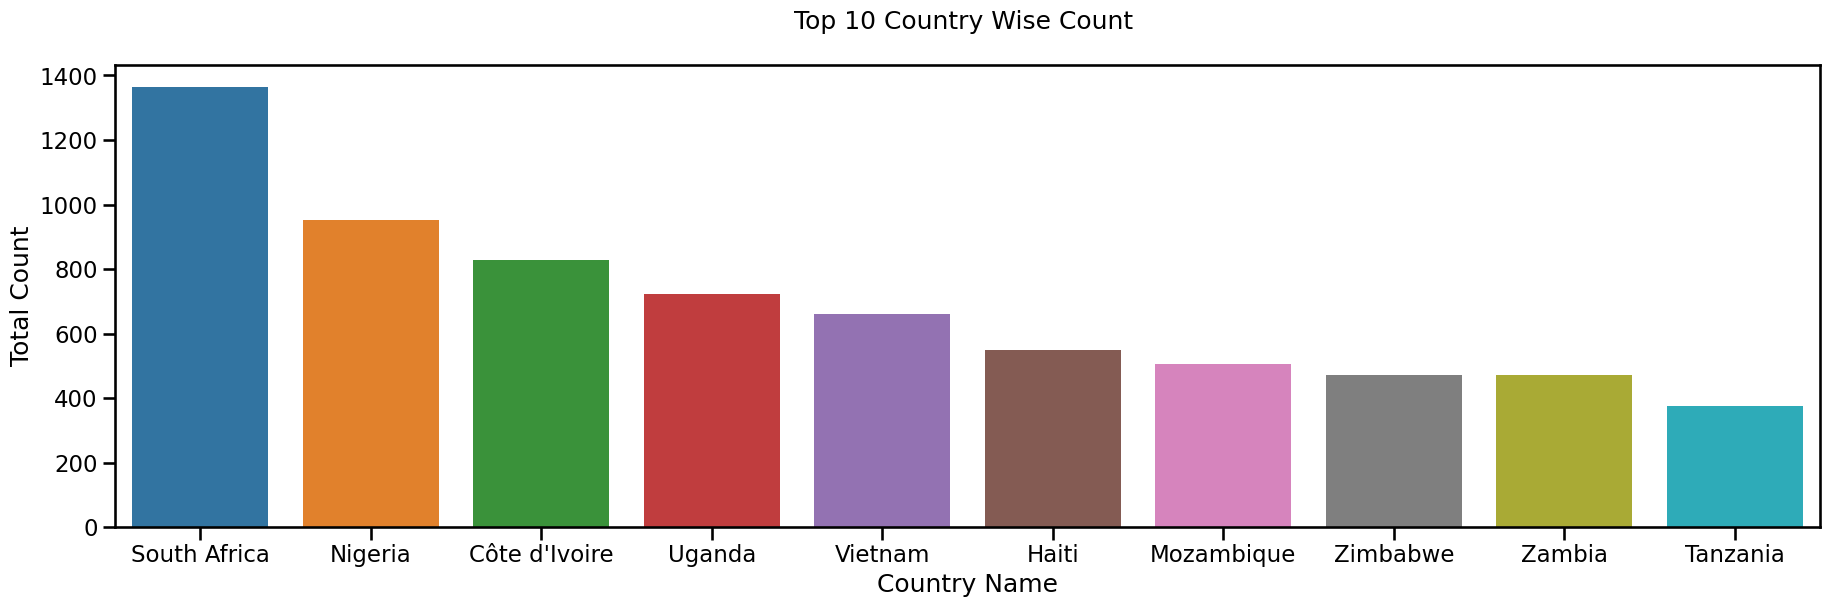

In [24]:
sn.set_context("talk", font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(x=DataSet['Country'], order= DataSet['Country'].value_counts().nlargest(10).index, palette= 'tab10')
plt.title('Top 10 Country Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

## 2. Visualization and EDA

### Investigating Delivery Delays

In [25]:
DataSet

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,60,5513,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [26]:
DataSet.info()

<class 'pandas.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8158 non-null   int64  
 1   Project Code                  8158 non-null   str    
 2   PQ #                          8158 non-null   str    
 3   PO / SO #                     8158 non-null   str    
 4   ASN/DN #                      8158 non-null   str    
 5   Country                       8158 non-null   str    
 6   Managed By                    8158 non-null   str    
 7   Fulfill Via                   8158 non-null   str    
 8   Vendor INCO Term              8158 non-null   str    
 9   Shipment Mode                 8158 non-null   str    
 10  PQ First Sent to Client Date  8158 non-null   str    
 11  PO Sent to Vendor Date        8158 non-null   str    
 12  Scheduled Delivery Date       8158 non-null   str    
 13  Delivered to Clie

In [27]:
# Correcting the datatypes in the dataset
DataSet['Scheduled Delivery Date']  = pd.to_datetime(DataSet['Scheduled Delivery Date']) 
DataSet['Delivered to Client Date']  = pd.to_datetime(DataSet['Delivered to Client Date']) 
DataSet.info()

<class 'pandas.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8158 non-null   int64         
 1   Project Code                  8158 non-null   str           
 2   PQ #                          8158 non-null   str           
 3   PO / SO #                     8158 non-null   str           
 4   ASN/DN #                      8158 non-null   str           
 5   Country                       8158 non-null   str           
 6   Managed By                    8158 non-null   str           
 7   Fulfill Via                   8158 non-null   str           
 8   Vendor INCO Term              8158 non-null   str           
 9   Shipment Mode                 8158 non-null   str           
 10  PQ First Sent to Client Date  8158 non-null   str           
 11  PO Sent to Vendor Date        8158 non-null 

C:\Users\keith\AppData\Local\Temp\ipykernel_21268\1619274097.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\keith\AppData\Local\Temp\ipykernel_21268\1619274097.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [28]:
# Calculating the delay in deliveries
DataSet['Delivery_Delay'] = DataSet['Delivered to Client Date'] - DataSet['Scheduled Delivery Date']
DataSet['Delivery_Delay'] = DataSet['Delivery_Delay'].dt.days
DataSet['Delivery_Delay']

21        0
22        0
23        0
29        0
32        0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 8158, dtype: int64

In [29]:
DataSet.groupby('Country')['Delivery_Delay'].mean().sort_values(ascending= False).reset_index()

,Country,Delivery_Delay
0,"Congo, DRC",15.277551
1,Togo,5.333333
2,Benin,3.700000
3,Senegal,1.500000
4,Botswana,0.666667
5,Afghanistan,0.000000
6,Angola,0.000000
7,Malawi,0.000000
8,Lebanon,0.000000
9,Burkina Faso,0.000000


### Total Pack Price for Top 15 Countries using Graphs

In [30]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print('Total pack price for top 15 countries \n')
print(TotalPrice)

Total pack price for top 15 countries 

Country
South Africa          23479.74
Vietnam               11015.11
Nigeria               10293.74
Côte d'Ivoire         10174.96
Uganda                 9781.99
Mozambique             5782.10
Haiti                  5029.42
Tanzania               4727.47
Zambia                 3780.12
Rwanda                 3721.67
Zimbabwe               3359.62
Guyana                 2209.95
Congo, DRC             2148.15
Ethiopia               1202.37
Dominican Republic     1089.23
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

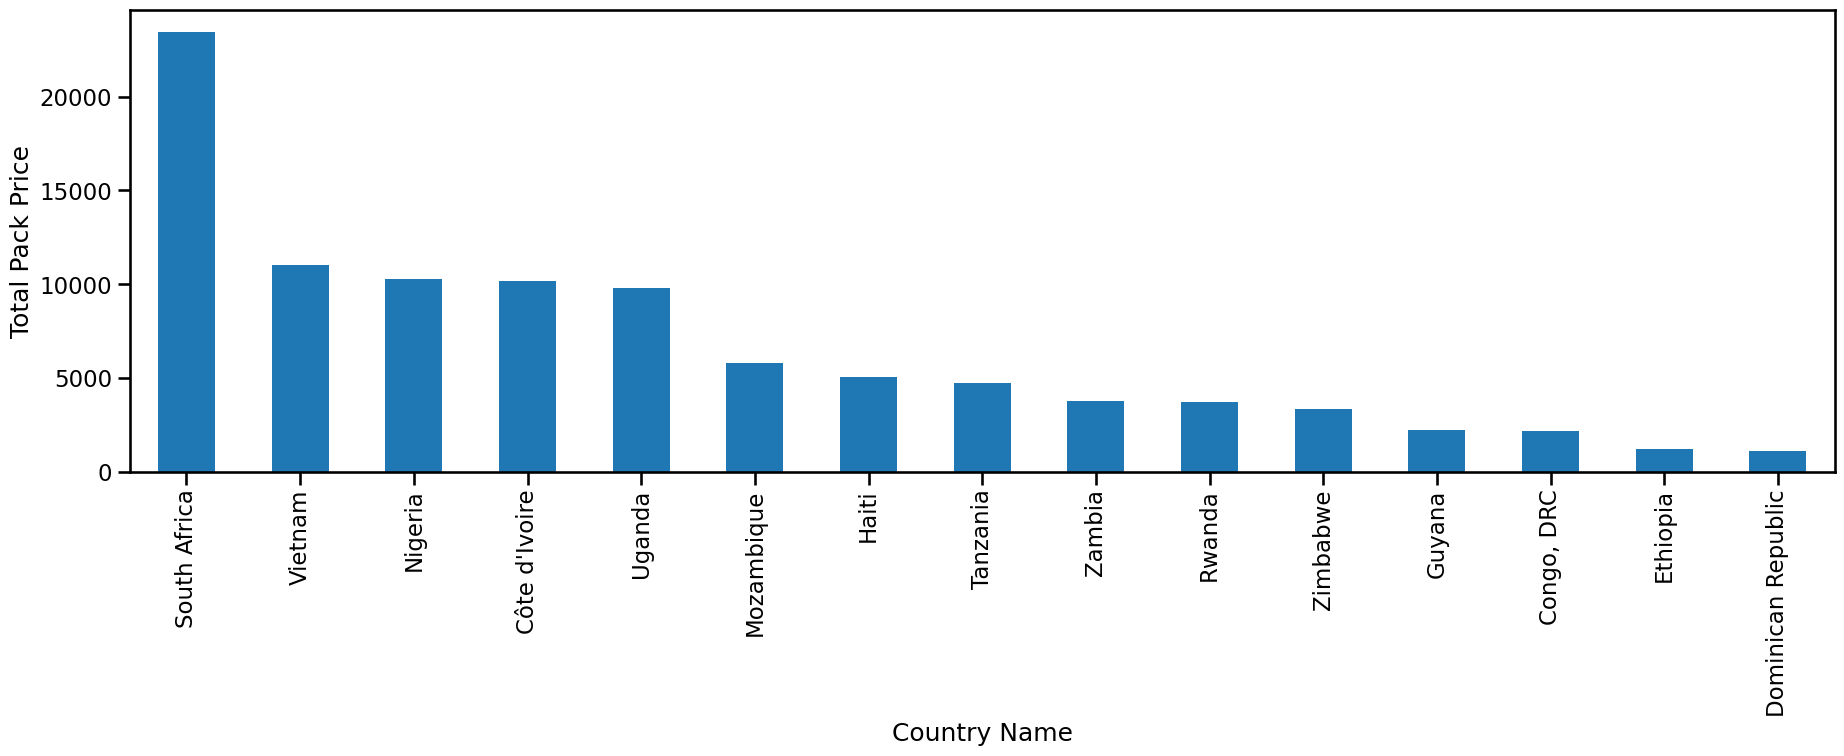

In [31]:
plt.figure(figsize=(22,6))
GraphData = TotalPrice
GraphData.plot(kind= 'bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

### First Line Designation Wise Count
First-line designation refers to medications that don't require previous treatment with other drugs, therefore gaining wider access to patients

C:\Users\keith\AppData\Local\Temp\ipykernel_21268\3954082601.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'First Line Designation')

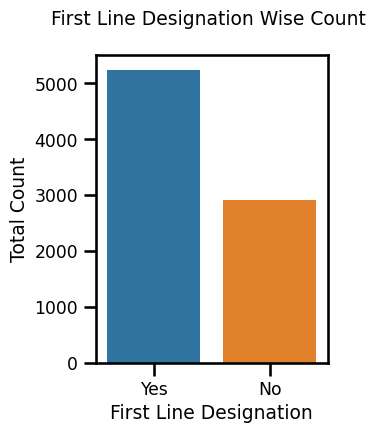

In [32]:
sn.set_context("talk",font_scale=.75)
plt.figure(figsize=(3,4))
sn.countplot(x = DataSet['First Line Designation'], order = DataSet['First Line Designation'].value_counts().index, palette= 'tab10')
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

### Shipment Mode Percentage Wise Pie Chart

In [33]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

### Unique Manufacturing Site Names

In [34]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

<ArrowStringArray>
[                                                      'BMS Meymac, France',
                                                'Aurobindo Unit III, India',
                                              'ABBVIE Ludwigshafen Germany',
                                           'Gilead(Nycomed) Oranienburg DE',
                                            'Ranbaxy, Paonta Shahib, India',
                                           'Mylan (formerly Matrix) Nashik',
                                                              'Roche Basel',
                                                            'GSK Ware (UK)',
                                          'Novartis Pharma AG, Switzerland',
                                                   'BI, Ingelheim, Germany',
                                               'Ipca Dadra/Nagar Haveli IN',
                                                         'MSD, Haarlem, NL',
                         

### Shipment Mode, Min and Mean Value for Air

In [35]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Air Shipment is : 89.33


## 3. Manufacturing Site Visualizations
Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         2978
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  624
Strides, Bangalore, India.         528
ABBVIE Ludwigshafen Germany        350
ABBVIE (Abbott) Logis. UK          204
BMS Meymac, France                 129
Aspen-OSD, Port Elizabeth, SA      125
MSD, Haarlem, NL                   117
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

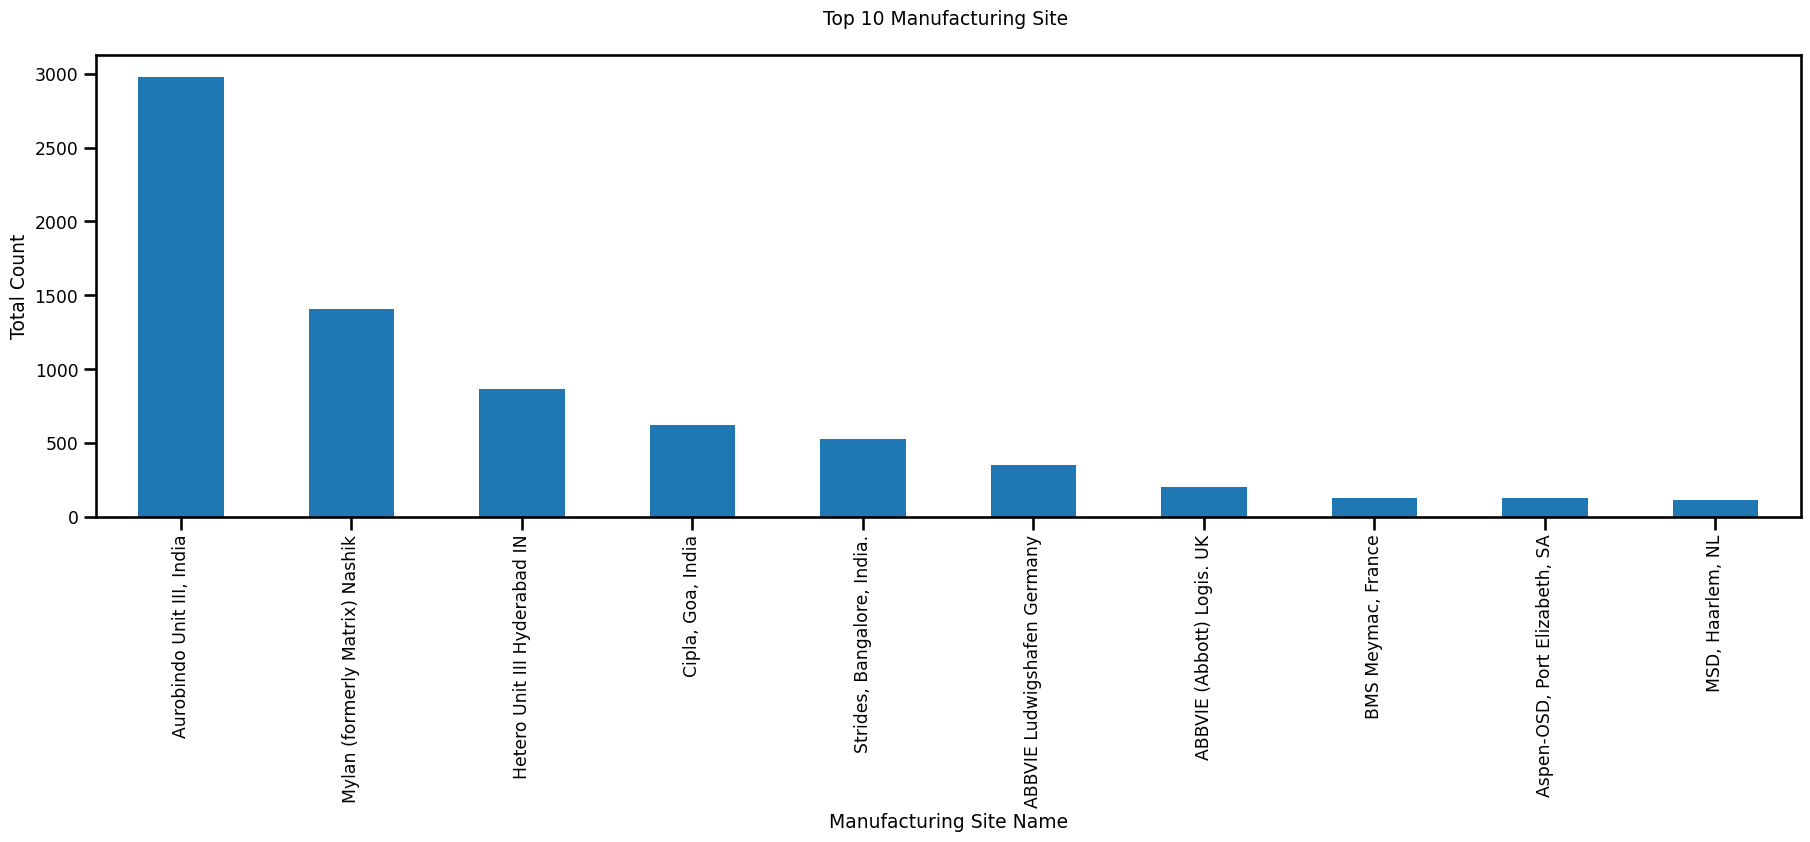

In [36]:
TopTenManufacturingSite = DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopTenManufacturingSite)

plt.figure(figsize=(22,6))
TopTenManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Manufacturing Site for Air Shipment Mode

Top 10 Air Manufacturing Site 

Manufacturing Site
Aurobindo Unit III, India         1641
Mylan (formerly Matrix) Nashik     695
Hetero Unit III Hyderabad IN       417
ABBVIE Ludwigshafen Germany        281
Cipla, Goa, India                  264
Strides, Bangalore, India.         251
ABBVIE (Abbott) Logis. UK          147
MSD, Haarlem, NL                    90
BMS Meymac, France                  83
Aspen-OSD, Port Elizabeth, SA       80
Name: count, dtype: int64


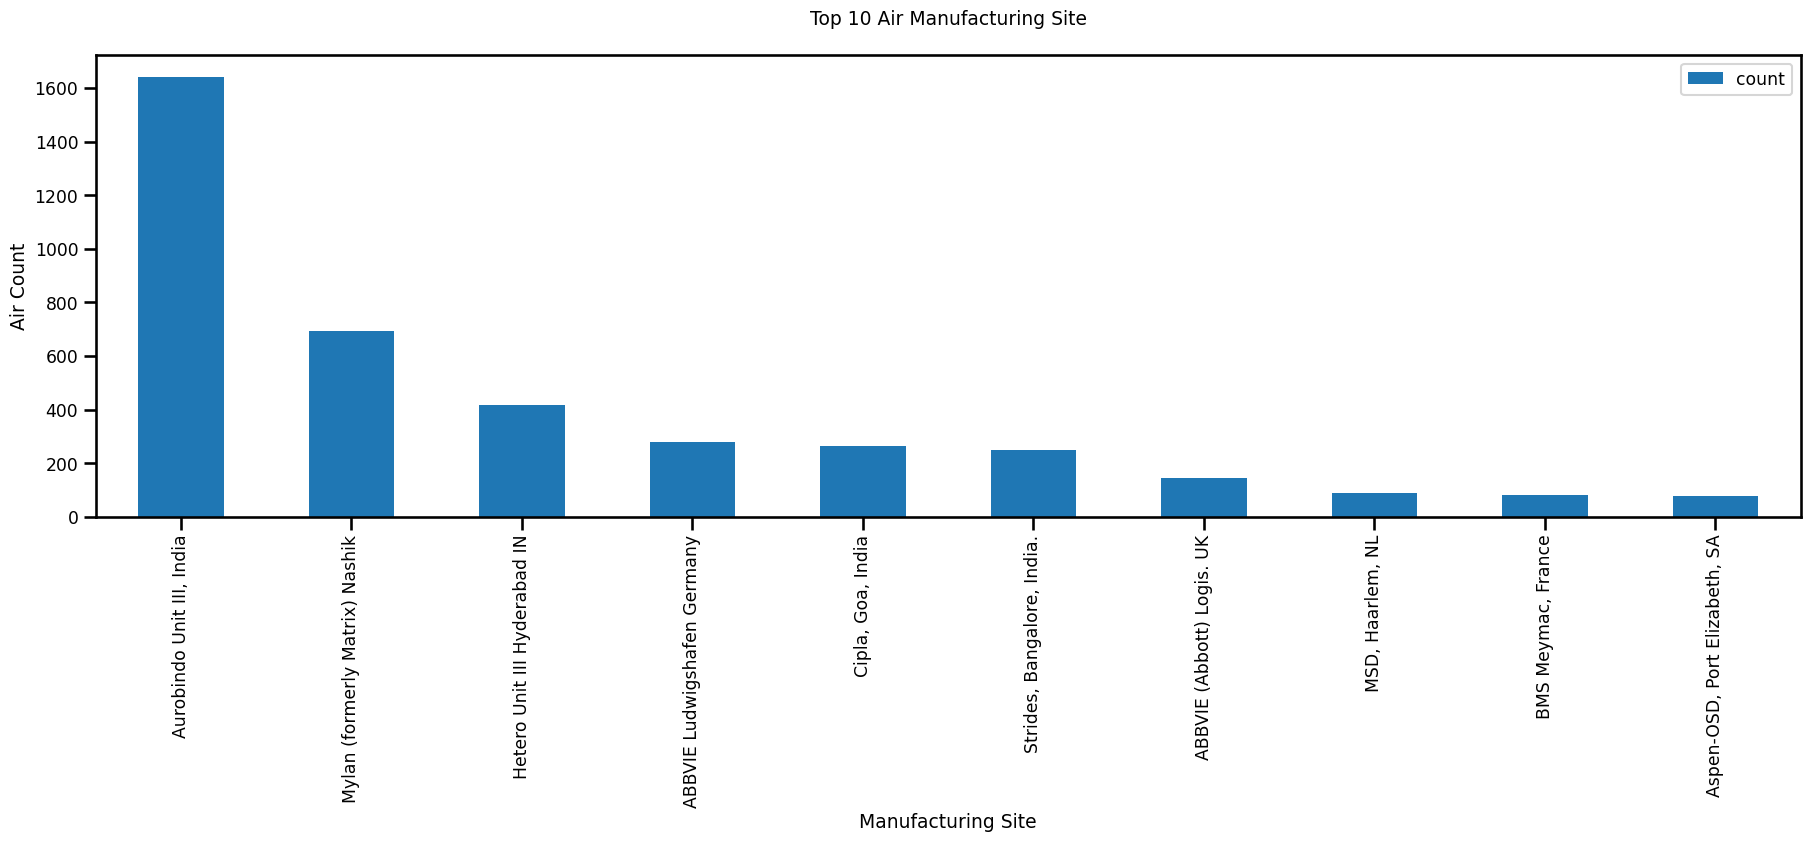

In [37]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData = DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))

plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)

### Shipment Mode and Pack Price in Bar Plot 

C:\Users\keith\AppData\Local\Temp\ipykernel_21268\2867167430.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




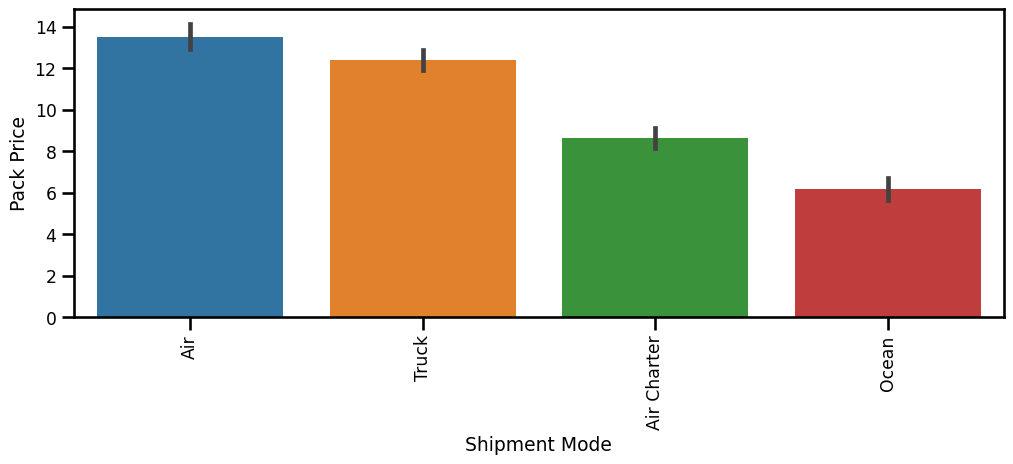

In [38]:
plt.subplots(figsize = (12,4))
plt.xticks(rotation = 90)
sn.barplot(x='Shipment Mode',y='Pack Price', data = DataSet, palette='tab10')
plt.show()

## Conclusion
- Top Country for Pack Price : Nigeria - 25,620.72
- Top Shipping Mode : Air
- The Max Air Shipment Mode is : 1000
- The Min Air Shipment is : 1
- The Mean Air Shipment is : 82.35
- Top Manufacturing Site : Aurobindo Unit III, India - 3172
- Top Air Manufacturing Site : Aurobindo Unit III, India - 1694